In [1]:
import pyreadr

import pandas as pd
import geopandas as gp
import matplotlib

from sklearn.preprocessing import LabelEncoder
from unidecode import unidecode

In [2]:
iller = gp.read_file('src/Konum_Verileri/TUR_adm1.shp')

In [3]:
data_14 = pyreadr.read_r('src/Syerel_secim_2014_il.RData')['yerel_secim_2014_il']
data_19 = pyreadr.read_r('yerel_secim_2019_il.RData')['yerel_secim_2019_il']

In [4]:
data_14['iller'] = data_14['Il_Adi'].str.lower() 
data_19['iller'] = data_19['Il_Adi'].str.lower() 
iller['iller'] = iller['NAME_1'].str.lower()

In [5]:
data_14['iller'] = data_14['iller'].apply(lambda x: unidecode(x))
data_19['iller'] = data_19['iller'].apply(lambda x: unidecode(x))
iller['iller'] = iller['iller'].apply(lambda x: unidecode(x))

In [6]:
iller = iller.sort_values(by='iller').reset_index(drop=True)
data_14 = data_14.sort_values(by='iller').reset_index(drop=True)
data_19 = data_19.sort_values(by='iller').reset_index(drop=True)

In [7]:
encoder = LabelEncoder()

data_14['Kazanan_Parti'] = data_14.iloc[:, 4:28].astype(float).idxmax(axis=1)
data_19['Kazanan_Parti'] = data_19.iloc[:, 4:17].astype(float).idxmax(axis=1)

# İki DataFrame'deki 'Kazanan_Parti' sütunlarını birleştirme
all_winners = pd.concat([data_14['Kazanan_Parti'], data_19['Kazanan_Parti']], ignore_index=True)

# LabelEncoder oluşturma ve tüm 'Kazanan_Parti' değerlerine fit_transform uygulama
encoder = LabelEncoder()
encoded_winners = encoder.fit_transform(all_winners)

# Her iki DataFrame'deki 'Kazanan_Parti' sütunlarını güncelleme
data_14['Encoded_Kazanan_Parti'] = encoded_winners[:len(data_14)]
data_19['Encoded_Kazanan_Parti'] = encoded_winners[len(data_14):]

In [8]:
iller['kazanan_14'] = data_14['Encoded_Kazanan_Parti']
iller['kazanan_19'] = data_19['Encoded_Kazanan_Parti']

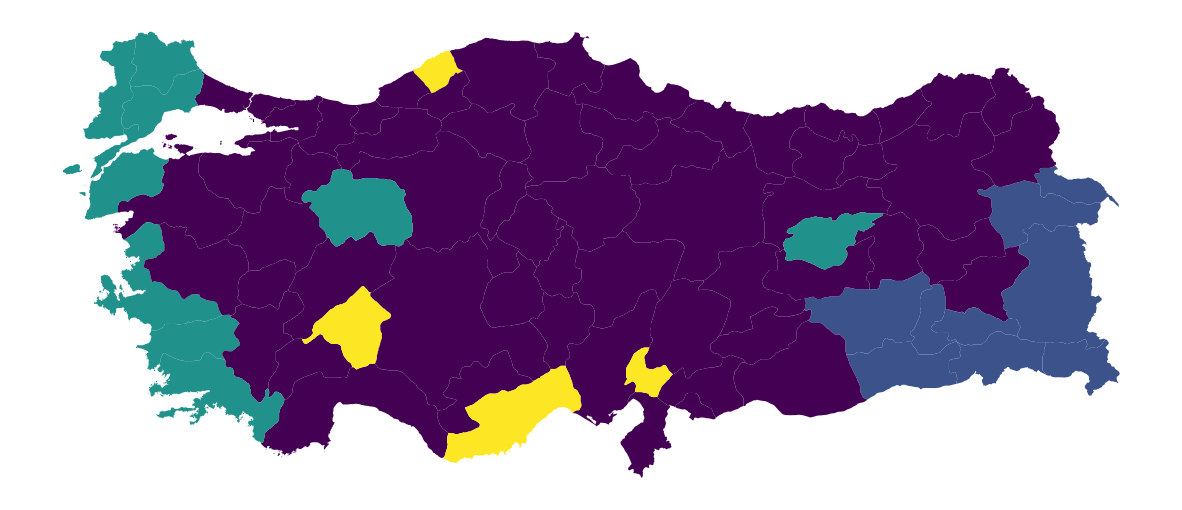

In [9]:
ax = iller.plot(figsize=(15,15), column='kazanan_14')
ax.set_axis_off()

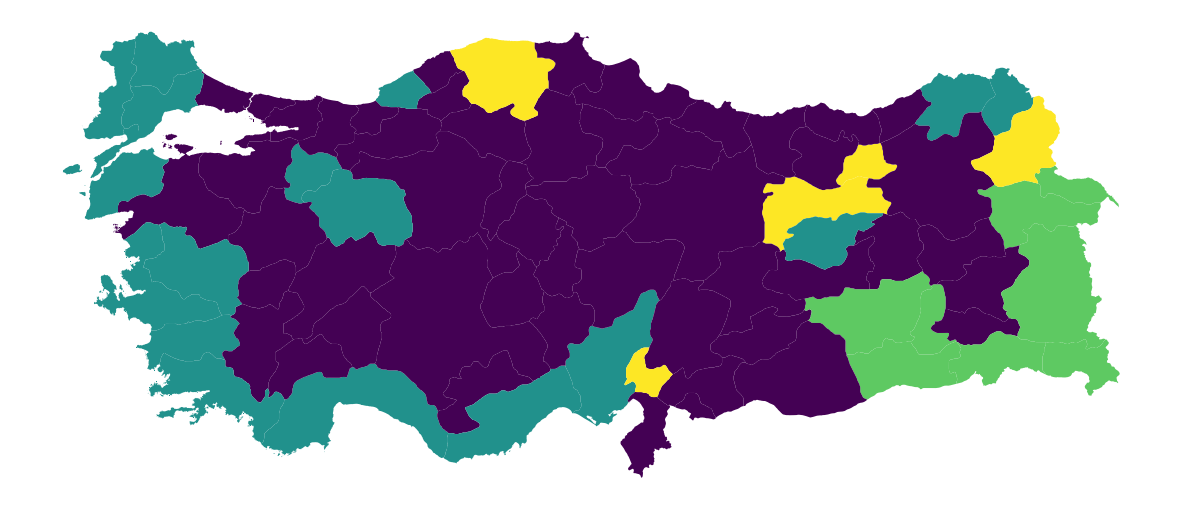

In [10]:
ax = iller.plot(figsize=(15,15), column='kazanan_19')
ax.set_axis_off()